In [1]:
%load_ext tikzmagic
%matplotlib inline

# 시각적 확률분포추정

앞 절에서 데이터 분석의 가장 기본적인 문제는 확률변수의 표본값으로부터 확률분포함수를 찾아내는 확률분포추정 문제라고 하였다. 이 절에서는 이러한 확률분포추정 문제를 푸는 방법을 설명한다. 확률분포를 추정하는 방법은 시각적 확률분포추정 방법과 이론적 확률분포추정 방법이 있다. 이 절에서는 우선 간단하고 직관적인 시각적 확률분포추정 방법을 설명한다. 

시각적 확률분포추정 방법은 다양한 차트/그래프로 확률분포의 모양을 추정하는 것이다. 데이터의 유형에 따라 다음과 같은 방법을 사용할 수 있다.

* 범주형 데이터의 경우: 
    * 카운트플롯(count plot)
* 수치형 데이터의 경우: 
    * 러그플롯(rug plot)
    * 히스토그램(histogram)
    * 커널밀도추정법(KDE: Kernel Density Estimation)
    * 박스플롯(boxplot)

## seaborn 패키지

이러한 기능은 여러가지 파이썬 패키지에서 제공하지만 여기에서는 seaborn 패키지에서 제공하는 기능에 대해 설명한다. seaborn 패키지는 파이썬의 기본 그래프 패키지인 matplotlib 패키지상에서 구현된 통계용 시각화 패키지다. 다음 명령으로 설치할 수 있다. 

```
pip install -U seaborn
```

seaborn 패키지는 보통 `sns`라는 별칭으로 임포트한다.

In [2]:
import seaborn as sns

seaborn 패키지에서는 몇가지 예제 데이터도 제공한다. 예를 들어 `load_dataset` 명령으로 식당의 고객 및 팁 데이터를 로드할 수 있다. 

In [3]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


위 데이터에서 하나의 레코드 행은 한 그룹의 고객을 나타낸다. 각 열 필드의 의미는 다음과 같다.

* total_bill : 고객이 지불한 금액
* tip : 고객이 낸 팁 금액
* sex : 지불한 고객의 성별
* smoker: 흡연유무
* day : 요일
* time : 중식 및 석식 여부
* size : 그룹의 인원수

## 범주형 데이터의 확률분포 시각화

범주형 데이터의 경우에는 각각의 값이 나온 횟수를 바차트로 표시하는 카운트플롯을 사용한다. 팁 데이터에서 `sex`, `smoker`, `day`, `time`, `size`는 범주형 데이터다.

seaborn 패키지는 카운트플롯을 그리는 `countplot` 함수를 제공한다.

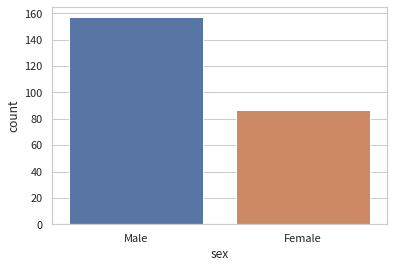

In [4]:
sns.countplot(x="sex", data=tips)
plt.show()

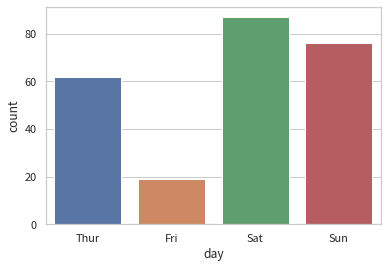

In [5]:
sns.countplot(x="day", data=tips)
plt.show()

## 수치형 데이터의 확률분포 시각화

수치형 데이터의 경우에는 러그플롯, 히스토그램, 커널밀도추정법 등을 사용한다. 팁 데이터에서 total_bill, tip은 수치형 데이터다.

### 러그플롯

러그플롯은 데이터의 위치를 작은 선분(rug)으로 표시하는 방법이다. seaborn 패키지는 러그플롯을 그리는 `rugplot` 함수를 제공한다.

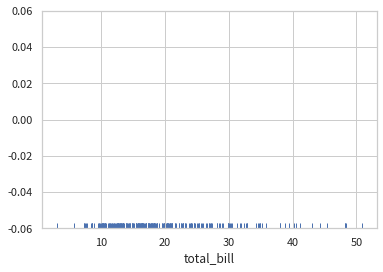

In [6]:
sns.rugplot(x="total_bill", data=tips)
plt.show()

두가지 수치형 데이터의 분포를 동시에 나타낼 수도 있다. 

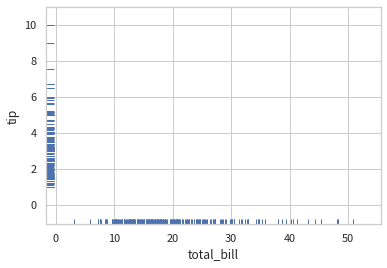

In [7]:
sns.rugplot(x="total_bill", y="tip", data=tips)
plt.show()

### 히스토그램

히스토그램은 수치형 데이터를 그 범위에 따라 분류하여 범주형 데이터로 바꾼 후 카운트플롯을 그린 것이다. seaborn 패키지는 히스토그램을 그리는 `histplot` 함수를 제공한다.

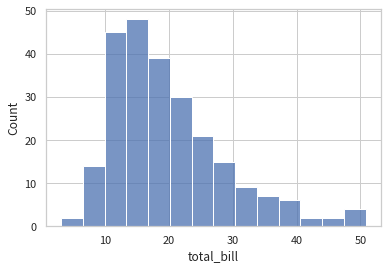

In [8]:
sns.histplot(x="total_bill", data=tips)
plt.show()

`bins` 인수를 사용하면 사용하는 수치값 범위의 개수를 조정할 수 있다. 

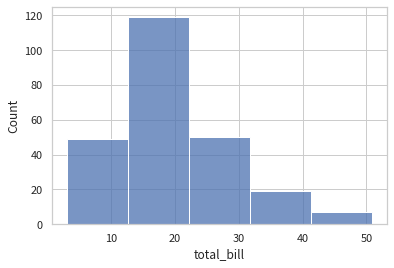

In [9]:
sns.histplot(x="total_bill", data=tips, bins=5)
plt.show()

### 커널밀도추정법

커널밀도추정법은 수치값 하나가 존재하는 위치마다 커널(kernel)이라고 부르는 작은 산봉우리 모양의 함수가 있다고 가정하여 모든 커널을 합친 모양을 보여주는 방법이다. seaborn 패키지는 커널밀도추정법에 의한 확률분포를 그리는 `kdeplot` 함수를 제공한다.

예를 들어 데이터 값에 $x_1=0, x_2=10$, 이렇게 두 수치값이 존재한다고 하자.

In [10]:
import pandas as pd

d1 = pd.DataFrame({"x": [0, 10]}) 
d1

,x
0,0
1,10


이 때 $x=0, x=10$ 두 위치에 다음과 같이 커널이 존재하게 된다.

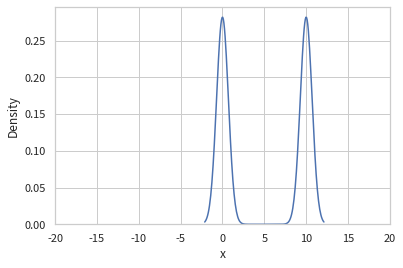

In [11]:
sns.kdeplot(x="x", data=d1, bw_method=0.1)
plt.xlim([-20, 20])
plt.show()

이 커널의 폭은 `bw_method` 인수값으로 조정할 수 있다. 예를 들어 커널의 폭을 증가시키면 다음과 같아진다.

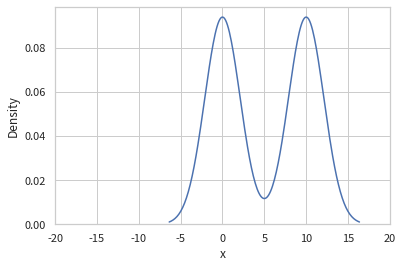

In [12]:
sns.kdeplot(x="x", data=d1, bw_method=0.3)
plt.xlim([-20, 20])
plt.show()

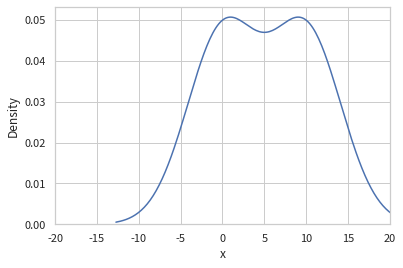

In [13]:
sns.kdeplot(x="x", data=d1, bw_method=0.6)
plt.xlim([-20, 20])
plt.show()

커널의 폭이 더 커지면 두 커널의 합이 하나의 봉우리처럼 보이게 된다.

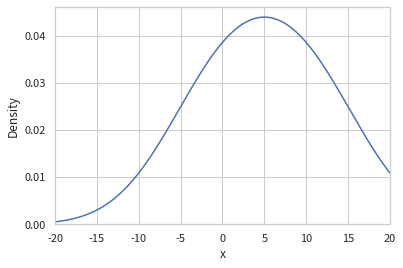

In [14]:
sns.kdeplot(x="x", data=d1, bw_method=1)
plt.xlim([-20, 20])
plt.show()

사용자가 `bw_method` 인수값을 주지 않으면 자동으로 Scott의 방법이라는 관행적인 방법으로 커널의 폭으르 정해준다.

커널밀도추정법으로 팁 예제 데이터의 total_bill 값의 확률분포를 구하면 다음과 같다.

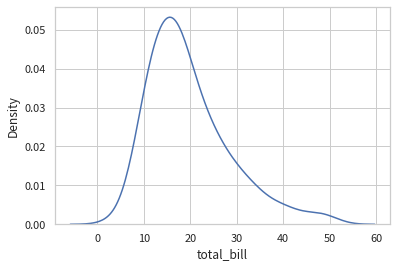

In [15]:
sns.kdeplot(x="total_bill", data=tips)
plt.show()

### 박스플롯

마지막으로 박스플롯(box plot)을 사용해서 수치값 데이터의 분포를 나타내는 방법도 있다. 박스플롯은 박스휘스커플롯(box-whisker plot)이라고도 부르는데 그 모양이 상자와 그 상자에 붙은 수염같다고 해서 이런 이름이 붙었다. 박스플롯을 이해하려면 다음 용어를 알아야 한다.

* 분위수(quantile)
* 사분위수(quartile)
* 중앙값(median)

분위수는 전체 데이터를 크기에 따라 정렬한 후 동일한 개수인 그룹으로 나눌때 기준이 되는 수를 말한다. 예를 들어 4분위수는 전체 데이터를 가장 작은 수부터 가장 큰 수까지 크기에 따라 정렬시킨 후 동일한 개수인 4개의 그룹으로 나눌 때 기준이 되는 수다. 

예를 들어 다음과 같은 12개의 수가 있다고 하자.

In [21]:
x = tips["total_bill"][:12]
x

0     16.99
1     10.34
2     21.01
3     23.68
4     24.59
5     25.29
6      8.77
7     26.88
8     15.04
9     14.78
10    10.27
11    35.26
Name: total_bill, dtype: float64

이 데이터를 크기에 따라 정렬하면 다음과 같다.

In [26]:
xs = x.sort_values().reset_index(drop=True)
xs

0      8.77
1     10.27
2     10.34
3     14.78
4     15.04
5     16.99
6     21.01
7     23.68
8     24.59
9     25.29
10    26.88
11    35.26
Name: total_bill, dtype: float64

numpy 패키지의 `quantile` 함수를 이용하면 다음과 같이 사분위수를 구할 수 있다.

In [29]:
np.quantile(x, [0.25, 0.5, 0.75])

array([13.67 , 19.   , 24.765])

다음 표를 보면 4분위수를 기준으로 전체 데이터를 4개의 (그룹의 원소의 수가 같은) 그룹으로 나눌 수 있다는 것을 알 수 있다.

| 값 | 사분위수 |
|-|-|
| 8.77 | |
| 10.27 | |
| 10.34 | |
| | 1사분위수 = 13.67 |
| 14.78 | |
| 15.04 | |
| 16.99 | |
| | 2사분위수 = 19 = 중앙값|
| 21.01 | |
| 23.68 | |
| 24.59 | |
| | 3사분위수 = 24.765 |
| 25.29 | |
| 26.88 | |
| 35.26| |


2사분위수는 전체 데이터를 2개의 그룹으로 나눌 때 기준이 되는 수가 되기 때문에 중앙값이라고 부른다.

박스플롯에서 상자는 1사분위수(Q1)와 3사분위수(Q3)의 범위를 가리킨다. 상자 중앙 근처의 가로선은 중앙값을 나타낸다.

3사분위수와 1사분수의 차이(Q3 - Q1)를 <b>IQR(inter-quartile range)</b>이라고 한다. 박스 외부의 세로선은 1사분위 수보다 1.5IQR만큼 낮은 값과 3사분위 수보다 1.5IQR만큼 높은 값의 구간을 기준으로 그 구간의 내부에 있는 가장 큰 데이터와 가장 작은 데이터를 잇는 선분이다. 

이 세로선보다도 바깥에 있는 값은 <b>아웃라이어(outlier)</b>라고하며 하나하나를 모두 점으로 표시한다.

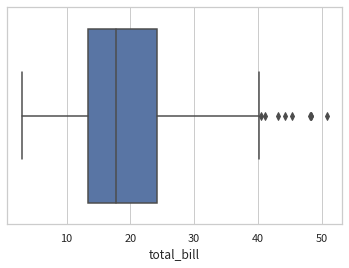

In [16]:
sns.boxplot(x="total_bill", data=tips)
plt.show()